# Body brain weights outliers

## Exercise: Load an plot the data

> **Exercise**: Load the data set into a `data_df` DataFrame. Load the `body` and `brain` columns into x/y Numpy arrays. Apply the Numpy `log()` function to both variables, store the result in a `x_log` and a `y_log` variable, and plot them.

**Self-assessment**: You should get a result similar to this one.

<img src="figures/body-brain-plot.png" width="350px" />

In [27]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDRegressor

In [7]:
# Load data
data_df = pd.read_csv('data/brain-and-body-weights.csv')
x = data_df.body
y = data_df.brain

# Rescale them
x_log = np.log(x)
y_log = np.log(y)

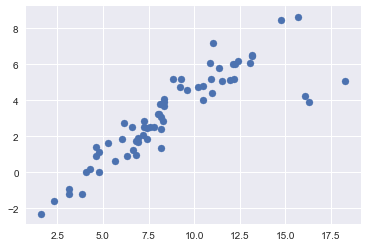

In [11]:
# Plot x_log/y_log
sns.set()
plt.scatter(x_log, y_log)

## Exercise: Filter outliers and fit a linear regression

> **Exercise**: (A) Fit a linear regression to `x_log` and `y_log`. (B) Filter the three outliers. (C) Fit another linear regression. (D) Visually compare the two models by plotting their prediction lines.

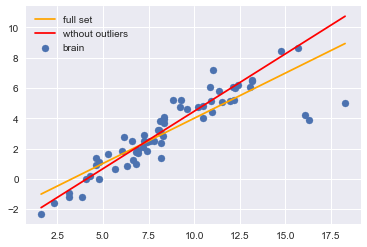

In [59]:
# (A) Fit a linear regression using all the data points
coefs = np.polyfit(x_log, y_log, deg=1)

# (B) Filter the three outliers
idx = (x_log >15) & (y_log <6)

x1_log, y1_log = x_log[~idx], y_log[~idx]

# (C) Fit a linear regression using the rest of the data points
coefs2 = np.polyfit(x1_log, y1_log, deg=1)

# (D) Plot the two models
x_values = np.linspace(min(x_log), max(x_log), num=100)
y_values = np.polyval(coefs, x_values)
y_values2 = np.polyval(coefs2, x_values)

plt.scatter(x_log, y_log)
plt.plot(x_values, y_values, color = 'orange', label = 'full set')
plt.plot(x_values, y_values2,  color='red', label = 'wthout outliers')
plt.legend()
plt.show()

## Exercise: Fit a linear regression using Huber loss

> **Exercise**: Fit a linear regression to `x_log` and `y_log` using Huber loss. Plot the prediction line.

**Self-assessment**: You should get a result close to the linear regression without outliers.

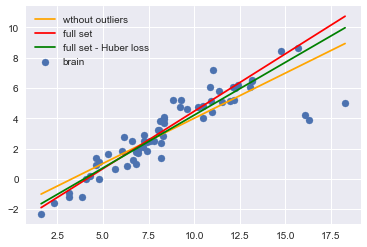

In [34]:
# Fit a linear regression using Huber loss
lr_huber = SGDRegressor(loss='huber', penalty='none', epsilon=1, max_iter=10000)
lr_huber.fit(x_log[:, np.newaxis], y_log)

# Plot the prediction line
y_values_huber = lr_huber.predict(
    x_values[:, np.newaxis] 
)

plt.scatter(x_log, y_log)
plt.plot(x_values, y_values, color = 'orange', label = 'wthout outliers')
plt.plot(x_values, y_values2,  color='red', label = 'full set')
plt.plot(x_values, y_values_huber,  color='green', label = 'full set - Huber loss')
plt.legend()
plt.show()

In [63]:
lr_huber.coef_

array([0.69732955])

## Exercise: Comptue the *Encephalization Quotient (EQ)*

We saw that the equation of a simple linear regression $y=ax+b$ is equivalent to $y=cx^{a}$ where $c=e^{b}$ when $x$ and $y$ are on a logarithmic scale. In our example, we can use this equation to calculate the **Encephalization Quotient (EQ)**.

The idea is to compute estimations of brain weights for each data point using $\hat{y}=cx^{a}$ and compare them to the actual brain weight. The EQ coefficient is defined as

$$
\text{EQ}=\frac{y}{\hat{y}}
$$

> **Exercise**: (A) Create the `a` and `c` values using the coefficients of the linear regression model without outliers. (B) Compute the estimated brain weights $\hat{y}$. (C) Compute the EQ values and add them to the `data_df` DataFrame. (D) Print the five rows with the largest quotients.

**Self-assessment**: You should see humans and monkeys in the first places - humans with an EQ around 7.

In [80]:
# (A) Create a and c values
a = coefs2[0]
c = np.exp(coefs2[1])

# (B) Compute predicted brain weights
y_pred = c*x_log**(a)

# (C) Compute EQ
data_df['EQ'] = y_log / y_pred

# (D) Print the five largest quotients
data_df.sort_values('EQ', ascending=False)[0:5]

,body,brain,label,EQ
49,62000.0,1320.0,Human,26.429834
60,2547000.0,4603.0,Asian elephant,24.895429
61,6654000.0,5712.0,African elephant,24.340054
46,52160.0,440.0,Chimpanzee,22.658459
39,6800.0,179.0,Rhesus monkey,22.605127
